## Import

In [1]:
import os
import json
import scanpy as sc
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "output_phenotypes"

In [3]:
output_path = os.path.join(path, 'infl_vs_excl')

In [5]:
th_path = '/th_55_15'

In [6]:
#os.makedirs("figures/rank_genes_groups_phenotype", exist_ok=True)

## Load

In [4]:
adata = sc.read_h5ad(os.path.join(path, 'adata_phenotype.h5ad'))

In [5]:
phenotype_key = 'phenotype'
cell_type_key = 'celltype'
sample_key = 'name'
patient_key = 'patient_id'
tissue_region_key = 'tissue_region'

In [9]:
# retain only inflamed and exluded for now
adata_infl_excl = adata[adata.obs[phenotype_key].isin(['inflamed', 'excluded'])].copy()

In [10]:
with open(os.path.join(path, "genes_no_source_75_25.json"), "r") as f: genes_no_source = json.load(f)

## Rank genes

### Cancer cell

In [37]:
genes_cancer = genes_no_source['Cancer cell']
adata_cancer = adata_infl_excl[:, adata_infl_excl.var_names.isin(genes_cancer)].copy()

In [38]:
sc.tl.rank_genes_groups(adata_cancer, phenotype_key, method='wilcoxon', key_added='rank_genes_groups_phenotype')

In [41]:
'''
sc.pl.rank_genes_groups_dotplot(
    adata_cancer,
    key='rank_genes_groups_phenotype',
    n_genes=10,        
    groupby=phenotype_key,
    standard_scale='var', 
    show=True
)
'''

"\nsc.pl.rank_genes_groups_dotplot(\n    adata_cancer,\n    key='rank_genes_groups_phenotype',\n    n_genes=10,        \n    groupby=phenotype_key,\n    standard_scale='var', \n    show=True\n)\n"

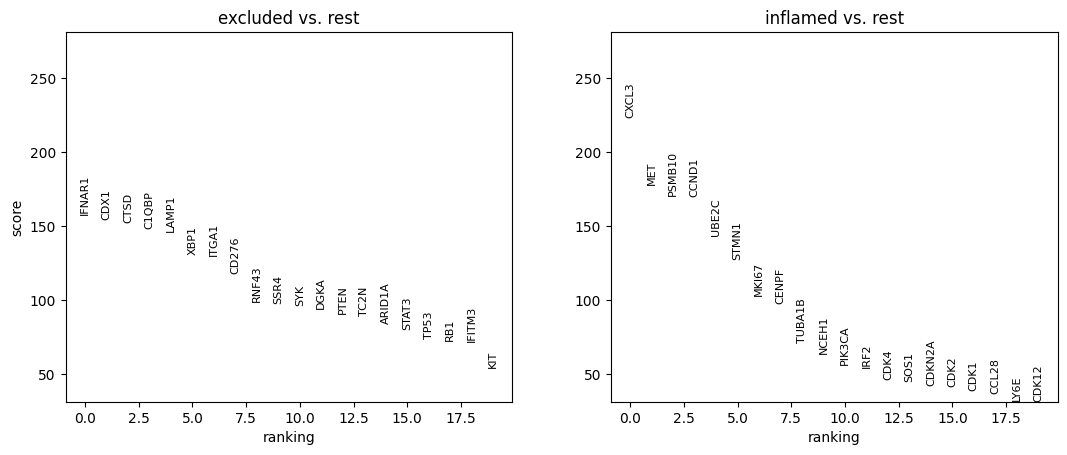

In [40]:
sc.pl.rank_genes_groups(
    adata_cancer,
    key='rank_genes_groups_phenotype',
    n_genes=20,        
    groupby=phenotype_key,
    standard_scale='var', 
    show=True,
    save=th_path
)

### T cell

In [11]:
genes_tcell = genes_no_source['T cell']
adata_tcell = adata_infl_excl[:, adata_infl_excl.var_names.isin(genes_tcell)].copy()

In [12]:
sc.tl.rank_genes_groups(adata_tcell, phenotype_key, method='wilcoxon', key_added='rank_genes_groups_phenotype')

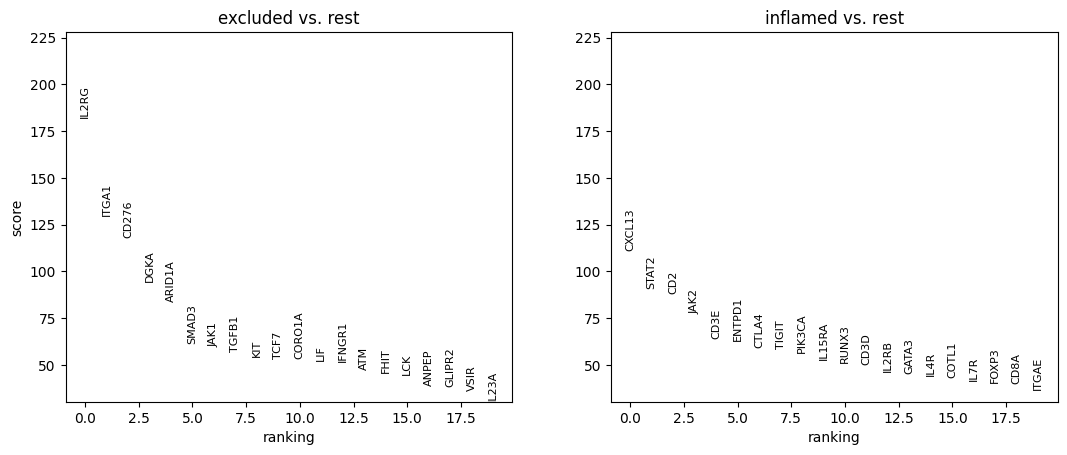

In [13]:
sc.pl.rank_genes_groups(
    adata_tcell,
    key='rank_genes_groups_phenotype',
    n_genes=20,        
    groupby=phenotype_key,
    standard_scale='var', 
    show=True,
    #save=th_path
)

### Fibroblast

In [14]:
genes_fibroblast = genes_no_source['Fibroblast']
adata_fibroblast = adata_infl_excl[:, adata_infl_excl.var_names.isin(genes_fibroblast)].copy()

In [15]:
sc.tl.rank_genes_groups(adata_fibroblast, phenotype_key, method='wilcoxon', key_added='rank_genes_groups_phenotype')

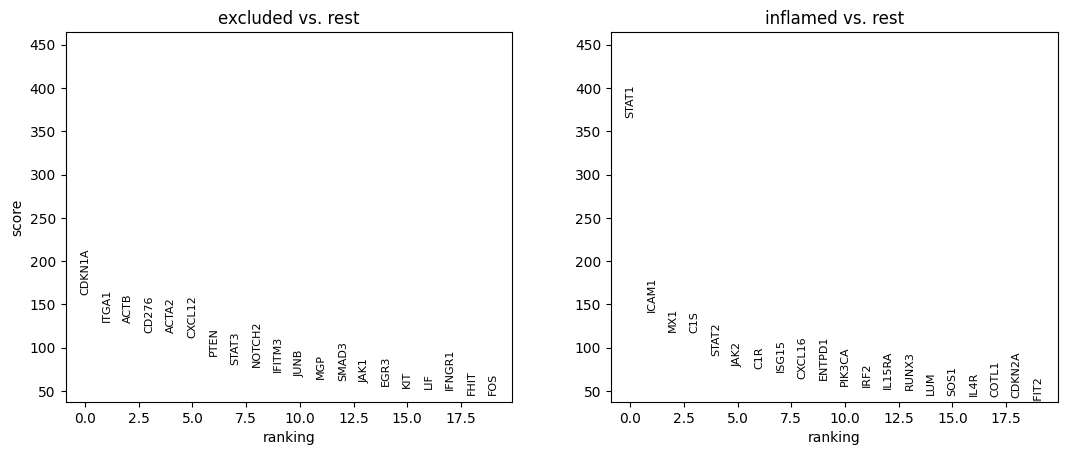

In [16]:
sc.pl.rank_genes_groups(
    adata_fibroblast,
    key='rank_genes_groups_phenotype',
    n_genes=20,        
    groupby=phenotype_key,
    standard_scale='var', 
    show=True,
    #save=th_path
)

### Dendritic cell

In [17]:
genes_dendritic = genes_no_source['Dendritic cell']
adata_dendritic = adata_infl_excl[:, adata_infl_excl.var_names.isin(genes_dendritic)].copy()

In [18]:
sc.tl.rank_genes_groups(adata_dendritic, phenotype_key, method='wilcoxon', key_added='rank_genes_groups_phenotype')

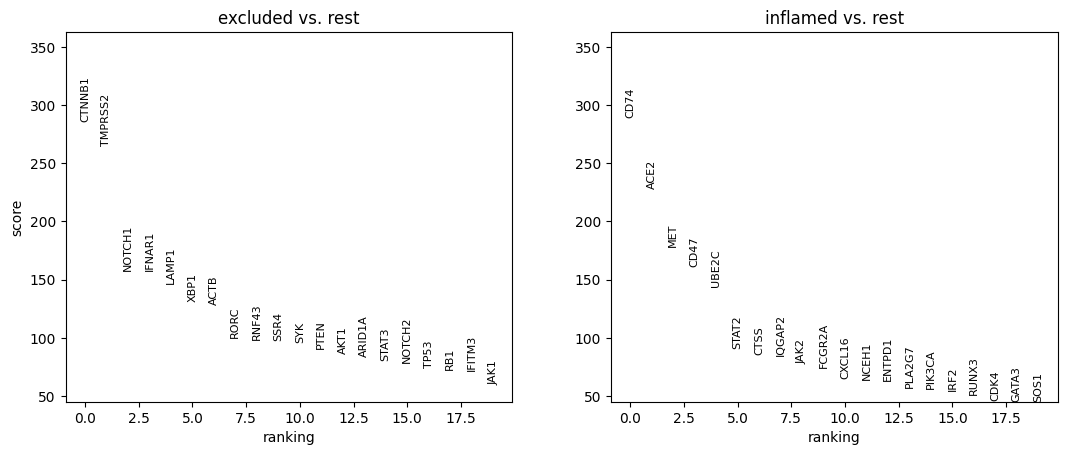

In [19]:
sc.pl.rank_genes_groups(
    adata_dendritic,
    key='rank_genes_groups_phenotype',
    n_genes=20,        
    groupby=phenotype_key,
    standard_scale='var', 
    show=True,
    #save=th_path
)

## Exploring with dotplots

In [6]:
adata_infl = adata[adata.obs[phenotype_key]=='inflamed'].copy()

In [7]:
adata_excl = adata[adata.obs[phenotype_key]=='excluded'].copy()

### Excluded

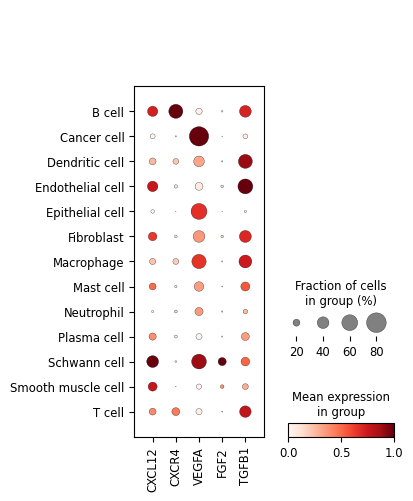

In [9]:
# CXCL12
sc.pl.dotplot(
    adata_excl,
    var_names=['CXCL12','CXCR4','VEGFA','FGF2','TGFB1'],
    groupby=cell_type_key,
    standard_scale='var', 
    show=True
)

Recent research has revealed that CAFs can help tumors evade immune control via several mechanisms. In human cancers, CAFs are associated with T cell dysfunction and exclusion, and preclinical studies have shown that CAFs directly prevent T cell recruitment or activation via secretion of CXCL12 and TGF-β or by creating a physical barrier via ECM deposition.

Like immune cells, CAFs produce several pro-angiogenic mediators, including VEGF-A, FGF2, and CXCL12, among others.
https://www.sciencedirect.com/science/article/pii/S1535610823000442 

CXCR4 expression is up-regulated in malignant cells via several mechanisms. VEGF is a known inducer of CXCR4 expression, and it has been shown that HIF-1 acts upstream to induce VEGF [45]. HIF-1 is a heterodimeric transcription factor responsive to oxygen concentrations in tissues and has been shown to up-regulate CXCR4 expression. Thus, in hypoxic regions of expanding tumors, chemokine receptor levels might be increased to facilitate survival and escape from the primary tumor mass. 
https://pmc.ncbi.nlm.nih.gov/articles/PMC3175097/#S2

CXCL12 is released by stromal cells and can recruit other cells to the tumor site, such as immune cells, which can further support tumor growth.

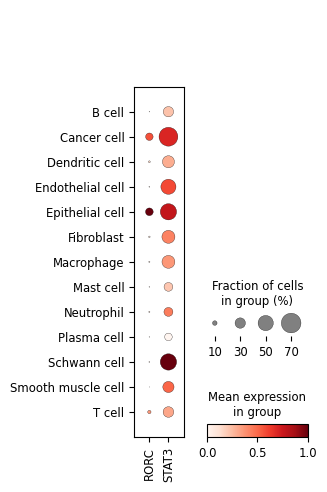

In [31]:
# RORC
sc.pl.dotplot(
    adata_excl,
    var_names=['RORC','STAT3'],
    groupby=cell_type_key,
    standard_scale='var', 
    show=True
)

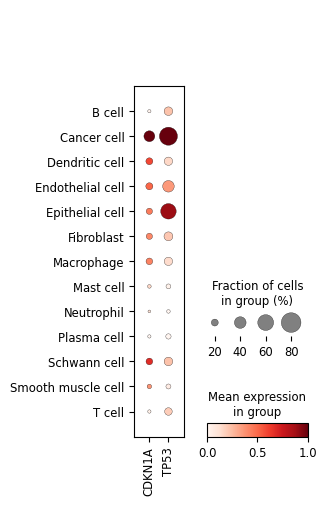

In [33]:
# CDKN1A
sc.pl.dotplot(
    adata_excl,
    var_names=['CDKN1A','TP53'],
    groupby=cell_type_key,
    standard_scale='var', 
    show=True
)

### Inflamed

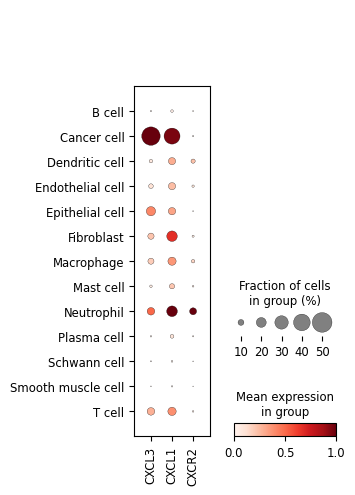

In [47]:
# CXCL3 and CXCL1
sc.pl.dotplot(
    adata_infl,
    var_names=['CXCL3','CXCL1','CXCR2'],
    groupby=cell_type_key,
    standard_scale='var', 
    show=True
)

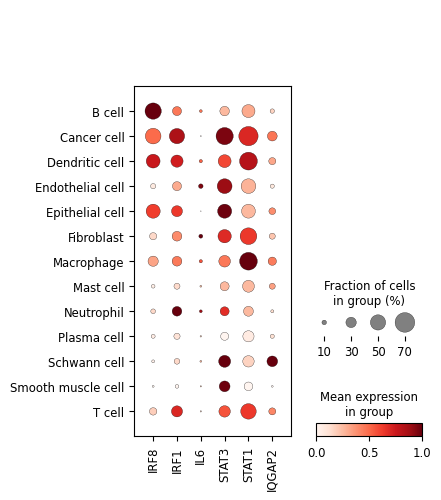

In [52]:
# IRF8, IRF1 and IQGAP2
sc.pl.dotplot(
    adata_infl,
    var_names=['IRF8','IRF1','IL6','STAT3','STAT1','IQGAP2'],
    groupby=cell_type_key,
    standard_scale='var', 
    show=True
)

## Closer look at TCF7

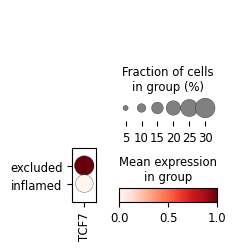

In [43]:
sc.pl.dotplot(
    adata_tcell,
    var_names=['TCF7'],
    groupby=phenotype_key,
    standard_scale='var', 
    show=True,
    #swap_axes=True
)

In [42]:
tcell = adata[adata.obs[cell_type_key]=='T cell'].copy()

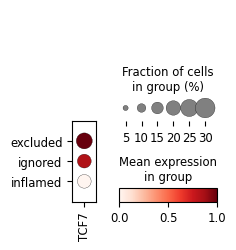

In [44]:
sc.pl.dotplot(
    tcell,
    var_names=['TCF7'],
    groupby=phenotype_key,
    standard_scale='var', 
    show=True,
    #swap_axes=True
)